1 困惑度的图
2 气泡图
3 分析出主题和高频词

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [19]:
filepath = './result.csv'

In [20]:
df = pd.read_csv(filepath)

In [21]:
df

,content
0,看盘用东财，论股用东财，交易用东财；用东方财富，一个APP搞定所有！立即开户>>
1,历时一年，大工程今天正式亮相
2,本周完美收官，下周继续
3,摒弃旧思维，拥抱新变革
4,残余的多头都是古神，新进的就是股圣！结果90后是最惨的！老江湖对垒机构！结构看机
...,...
1596,卯线#并购重组概念活跃，能否成市场主线？#
1597,我和我兄弟的故事「真人真事」
1598,A股很反常！做好准备，下周大动作！
1599,各地房价是否应该≈当地建设成本×估价时点A股的平均股价


In [22]:
contents = df.content.tolist()
contents

['看盘用东财，论股用东财，交易用东财；用东方财富，一个APP搞定所有！立即开户>>',
 '历时一年，大工程今天正式亮相',
 '本周完美收官，下周继续',
 '摒弃旧思维，拥抱新变革',
 '残余的多头都是古神，新进的就是股圣！结果90后是最惨的！老江湖对垒机构！结构看机',
 '今晚睡不着了，市场突发2个消息，有点不对劲了，关于下周行情，我要明确一点！',
 '司马懿马哥黎明按时啼叫：下午星期高点是3346点，个人关点，仅供参考，下个星期底',
 '出大事了，大事不好了，美债崩了，周一怎么走？',
 '凭内力#并购重组概念活跃，能否成市场主线？#',
 '不知道#并购重组概念活跃，能否成市场主线？#',
 '突发特大利好！上交所之后轮到深交所了？A股明天买不到了？',
 '34支科技重组票',
 '两千字深度解析下周；东方财富，上证指数，银之杰！下周龙头已经确认，金融从业者分析师可以抄作业！个人分析不存在入场操作指导（点个赞',
 '科技重组目前38只',
 '下周一，一根大阳线，改变所有大盘股的趋势！我现在写下周银之杰走势，点个赞来个关注！',
 '明天全面性开花？让大家涨到头晕目眩？',
 '明天就要开盘了，我就用一个字给大家概括：涨！',
 '突发，中信减多单，期指又跌了，赶紧来提醒大家',
 '周一大盘沪指下跌概率大',
 '周末重磅！中文在线的机会来了！准确的说是传媒板块要被游资盯上了',
 '本周要大跌？股神刘昌松紧急提醒：A股真要变盘了，不开玩笑！',
 'A股：周末重磅利好来袭，深交所全网测试完成，明日市场大概率会进一步的上行！！！',
 '美利信#并购重组概念活跃，能否成市场主线？#',
 '又有东西给你们学习了',
 '财政部送利好，且全年有信心完成 5% 增长，增量资金不断入场。',
 '如果你迷茫，不知道炒什么，可以重点这篇文章，关注这个票，未来市值可能一万亿深交所这轮大涨的扛旗者！只有他才能称上万股之王！',
 '关于明天A股的行情，我还要强调一下，以防有人没有看到:',
 '周一长阳收腹3400别问为什么预感就是这么告诉我的',
 '同学们晚上好记得吃晚饭、周末的最后一天大家早点休息，调整好状态！咱们明天继续战斗',
 '并购重组概念一览表',
 '下周大盘走势分析：关注经济数据，关注三季报业绩高增长行业',
 '从时间节点来看，很

#### 1 困惑度的图

In [23]:
import pandas as pd
import jieba
import jieba.analyse
import gensim
import gensim.corpora as corpora
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models

In [24]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [25]:
# 加载停用词
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = set(line.strip() for line in file)
    return stopwords

In [26]:
# 文本预处理函数
def preprocess(text, stopwords):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9]', '', text)
    seg_list = jieba.cut(text)
    filtered_tokens = [token for token in seg_list if token not in stopwords and len(token) > 1]
    
    return filtered_tokens

In [27]:
# 加载停用词
stopwords = load_stopwords('stopwords.txt')
texts = df['content'].apply(lambda x: preprocess(x, stopwords)).tolist()

In [28]:
texts

[['看盘',
  '用东',
  '财论',
  '股用',
  '东财',
  '交易',
  '用东',
  '财用',
  '东方',
  '财富',
  'APP',
  '搞定',
  '立即',
  '开户'],
 ['历时', '一年', '工程', '正式', '亮相'],
 ['本周', '完美', '收官', '下周'],
 ['摒弃', '思维', '拥抱', '变革'],
 ['残余', '多头', '古神', '新进', '股圣', '最惨', '老江湖', '对垒', '机构', '结构', '看机'],
 ['今晚', '睡不着', '市场', '突发', '不对劲', '下周', '行情', '我要', '明确'],
 ['司马懿', '马哥', '黎明', '按时', '啼叫', '下午', '星期', '高点', '关点', '仅供参考', '下个星期'],
 ['大事', '大事不好', '美债', '周一'],
 ['内力', '并购', '重组', '概念', '活跃', '能否', '市场', '主线'],
 ['并购', '重组', '概念', '活跃', '能否', '市场', '主线'],
 ['突发', '特大', '利好', '上交所', '深交所', 'A股', '明天', '买不到'],
 ['科技', '重组'],
 ['两千',
  '深度',
  '解析',
  '下周',
  '东方',
  '财富',
  '上证指数',
  '银之杰',
  '下周',
  '龙头',
  '确认',
  '金融',
  '从业者',
  '分析师',
  '作业',
  '分析',
  '存在',
  '入场',
  '操作',
  '指导',
  '点个'],
 ['科技', '重组'],
 ['下周一', '一根', '大阳线', '改变', '大盘股', '趋势', '写下', '周银之杰', '走势', '点个', '赞来'],
 ['明天', '全面性', '开花', '头晕目眩'],
 ['明天', '就要', '开盘', '概括'],
 ['突发', '中信', '减多单', '期指', '赶紧', '提醒'],
 ['周一', '大盘', '下跌', '概率'],
 ['周末', '重磅', '

In [29]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [30]:
min_topics = 2
max_topics = 20
num_of_topics = range(min_topics, max_topics + 1)

perplexities = []

best_perplexity = float('inf')
best_num_topic = None
best_lda_model = None

for num_topic in num_of_topics:
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topic, passes=10, workers=2)
    
    perplexity = lda_model.log_perplexity(corpus)
    
    adjusted_perplexity = np.exp2(-perplexity)
    
    perplexities.append(adjusted_perplexity)
    
    print(f"主题数目 = {num_topic}, 困惑度 = {adjusted_perplexity:.4f}")
    
    if adjusted_perplexity < best_perplexity:
        best_perplexity = adjusted_perplexity
        best_num_topic = num_topic
        best_lda_model = lda_model
    
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    # pyLDAvis.save_html(vis, f'LDA_{num_topic}_topics.html')

主题数目 = 2, 困惑度 = 181.3233
主题数目 = 3, 困惑度 = 187.5417
主题数目 = 4, 困惑度 = 198.7582
主题数目 = 5, 困惑度 = 201.7945
主题数目 = 6, 困惑度 = 207.5044
主题数目 = 7, 困惑度 = 206.3812
主题数目 = 8, 困惑度 = 210.2407
主题数目 = 9, 困惑度 = 217.3506
主题数目 = 10, 困惑度 = 218.2443
主题数目 = 11, 困惑度 = 220.3402
主题数目 = 12, 困惑度 = 224.6746
主题数目 = 13, 困惑度 = 225.2152
主题数目 = 14, 困惑度 = 229.6032
主题数目 = 15, 困惑度 = 222.0125
主题数目 = 16, 困惑度 = 232.1888
主题数目 = 17, 困惑度 = 237.2315
主题数目 = 18, 困惑度 = 234.2715
主题数目 = 19, 困惑度 = 235.1682
主题数目 = 20, 困惑度 = 237.0428


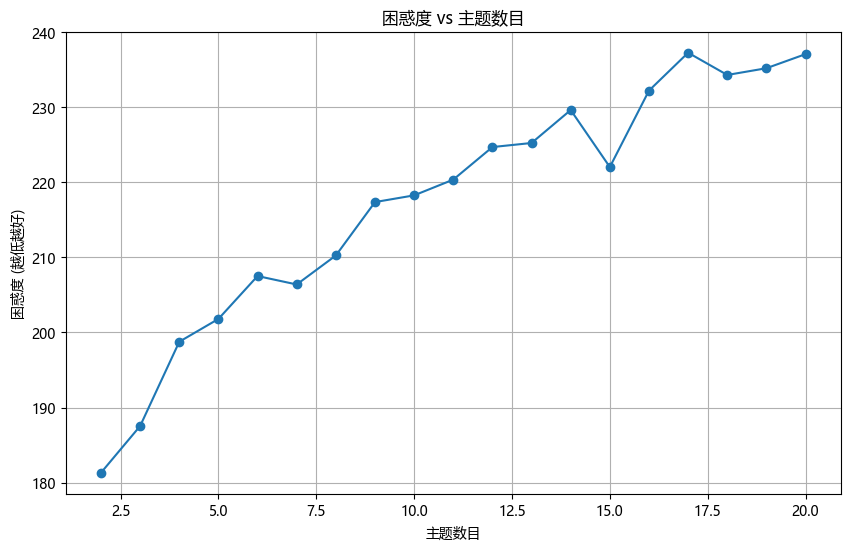

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(num_of_topics, perplexities, marker='o')
plt.title("困惑度 vs 主题数目")
plt.xlabel("主题数目")
plt.ylabel("困惑度 (越低越好)")
plt.grid(True)
plt.show()

#### 2 气泡图

In [32]:

vis = pyLDAvis.gensim_models.prepare(best_lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, f'LDA_{best_num_topic}_topics_best.html')


#### 分析出主题和高频词

In [17]:

# 输出最优主题数目的LDA模型
print(f"最优主题数目 = {best_num_topic}, 最优困惑度 = {best_perplexity:.4f}")
for topic_id, topic in enumerate(best_lda_model.print_topics()):
    print(f"主题 {topic_id}: {topic}")

最优主题数目 = 2, 最优困惑度 = 182.7447
主题 0: (0, '0.016*"下周" + 0.010*"A股" + 0.007*"股市" + 0.007*"利好" + 0.006*"光伏" + 0.006*"行情" + 0.005*"暴涨" + 0.005*"大盘" + 0.004*"新能源" + 0.004*"科技"')
主题 1: (1, '0.040*"重组" + 0.036*"并购" + 0.035*"市场" + 0.030*"概念" + 0.029*"活跃" + 0.028*"能否" + 0.028*"主线" + 0.009*"牛市" + 0.007*"交易" + 0.006*"大盘"')
